In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [2]:
i=224
b=32

In [8]:
from google.colab import files
files.upload()
!mkdir-p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

Saving kaggle.json to kaggle (2).json
/bin/bash: line 1: mkdir-p: command not found


In [11]:
!kaggle datasets download -d sujaykapadnis/smoking
!unzip -q smoking.zip -d dataset

Dataset URL: https://www.kaggle.com/datasets/sujaykapadnis/smoking
License(s): Attribution 4.0 International (CC BY 4.0)
smoking.zip: Skipping, found more recently modified local copy (use --force to force download)


In [12]:
train_gen=ImageDataGenerator(rescale=1./255,validation_split=0.2)

In [13]:
train_data=train_gen.flow_from_directory(
    '/content/dataset/Training',
    target_size=(i,i),
    batch_size=b,
    class_mode="binary",
    subset="training"
)

Found 573 images belonging to 1 classes.


In [15]:
val_data=train_gen.flow_from_directory(
    "/content/dataset/Validation",
    target_size=(i,i),
    batch_size=b,
    class_mode='binary',
    subset='validation'
)

Found 36 images belonging to 1 classes.


In [16]:
model=keras.Sequential([
    layers.Conv2D(32,(3,3),activation='relu',input_shape=(i,i,3)),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,(3,3),activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(128,(3,3),activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Flatten(),
    layers.Dense(128,activation='relu'),
    layers.Dense(1,activation='sigmoid')
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [17]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [19]:
model.fit(train_data,epochs=10,validation_data=val_data)

Epoch 1/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 1.0000 - loss: 3.9039e-24

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


18/18 ━━━━━━━━━━━━━━━━━━━━ 39s 2s/step - accuracy: 1.0000 - loss: 3.7574e-24 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 2/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 37s 2s/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 3/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 37s 2s/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 4/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 41s 2s/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 5/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 38s 2s/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 6/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 44s 2s/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 7/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 39s 2s/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 8/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 38s 2s/step - accuracy: 1.0000 - lo

In [20]:
model.save('/content/train.h5')

In [23]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as m
import numpy as n
model=load_model('/content/train.h5')
print("Model Loaded Successfully")

Model Loaded Successfully


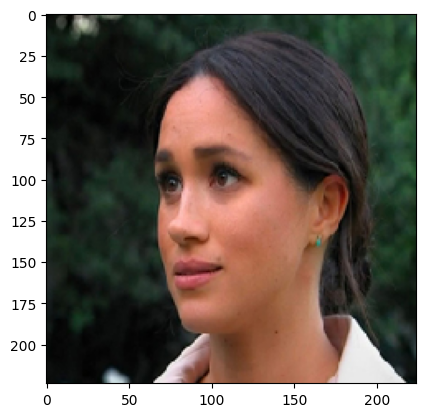

In [24]:
path="/content/notsmoking_0006.jpg"
img=image.load_img(path,target_size=(i,i))
m.imshow(img)
m.axis()
m.show()

In [26]:
img_arr=image.img_to_array(img)
img_arr=n.expand_dims(img_arr,axis=0)
img_arr=img_arr/255
pred=model.predict(img_arr)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step


In [27]:
if pred<=0.5:
  print('No Smoke')
else:
  print("Smoke")

No Smoke
